In [192]:
!pip install xlrd
!pip install openpyxl

In [193]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np

In [194]:
# importing the dataset. It is an excel file
df = pd.read_excel('Adidas US Sales Datasets.xlsx')

In [195]:
# Checking the shape
df.shape

(9648, 13)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [197]:
df = df.replace(" ", np.NaN)


In [198]:
#checking null or missing values
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

Hence, No missing data.

In [199]:
# Using the head function
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


## Time Series Trends

### Analysing Number of Units Sold

In [200]:
# resample function resamples the data and converts the data into the desired timeseries.
# Here we are summarizing the data on a monthly basis for units sold
m_orders_df = df.set_index('Invoice Date')['Units Sold'].resample('M').sum()

In [201]:
m_orders_df

Invoice Date
2020-01-31     48333
2020-02-29     37846
2020-03-31     46972
2020-04-30     54709
2020-05-31     35705
2020-06-30     16269
2020-07-31     38219
2020-08-31     62307
2020-09-30     46125
2020-10-31     30167
2020-11-30     25152
2020-12-31     20545
2021-01-31    179299
2021-02-28    156113
2021-03-31    143988
2021-04-30    161717
2021-05-31    178900
2021-06-30    164745
2021-07-31    180481
2021-08-31    195414
2021-09-30    182425
2021-10-31    152834
2021-11-30    149350
2021-12-31    171246
Freq: M, Name: Units Sold, dtype: int64

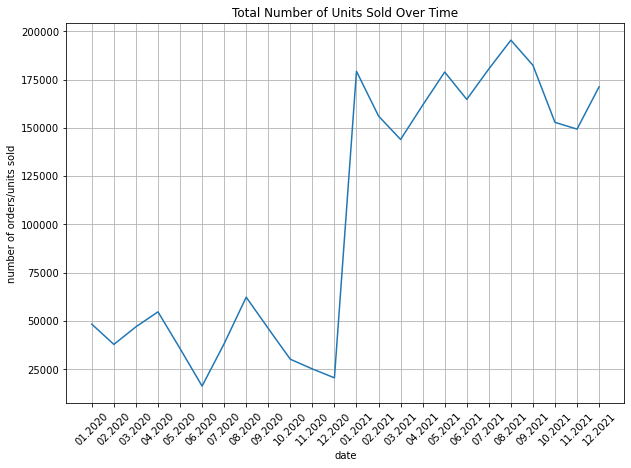

In [202]:
# Creating a Line Chart for the data 
ax = pd.DataFrame(m_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/units sold')
ax.set_title('Total Number of Units Sold Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_orders_df.index)), 
    [x.strftime('%m.%Y') for x in m_orders_df.index], 
    rotation=45
)

plt.show()

From the chart, we see a sharp spike in the number of units sold after December 2020 from 20,545 to 179,299 in January 2021. We will further check on this trend.

In [203]:
# Here we are summarizing the data on a monthly basis of total retailers  
m_retailer_df = df.set_index('Invoice Date')['Retailer'].resample('M').nunique()

In [204]:
m_retailer_df

Invoice Date
2020-01-31    2
2020-02-29    2
2020-03-31    2
2020-04-30    3
2020-05-31    4
2020-06-30    1
2020-07-31    3
2020-08-31    4
2020-09-30    4
2020-10-31    3
2020-11-30    2
2020-12-31    3
2021-01-31    5
2021-02-28    6
2021-03-31    6
2021-04-30    6
2021-05-31    6
2021-06-30    6
2021-07-31    6
2021-08-31    6
2021-09-30    6
2021-10-31    6
2021-11-30    6
2021-12-31    6
Freq: M, Name: Retailer, dtype: int64

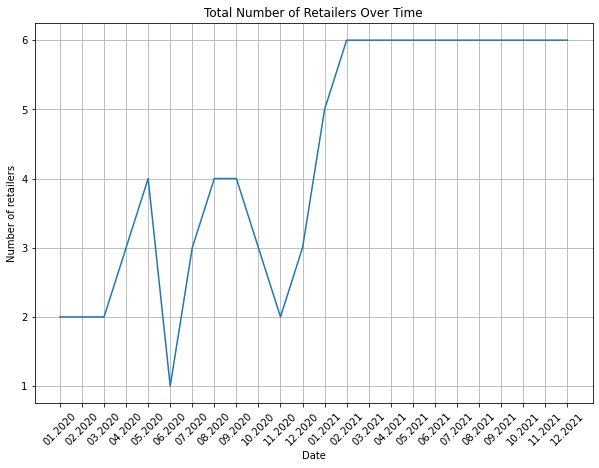

In [205]:
# Creating a Line Chart for the data 
ax = pd.DataFrame(m_retailer_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('Date')
ax.set_ylabel('Number of retailers')
ax.set_title('Total Number of Retailers Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_orders_df.index)), 
    [x.strftime('%m.%Y') for x in m_orders_df.index], 
    rotation=45
)

plt.show()

From the above chart, we can see that number of retailers increased from 2 in November 2020 to 6 in February 2021. The trend shown in above chart imitates the trend in 'Units Sold' chart i.e. with increase in number of retailers, the sales have also increased. 
This could be a result of ease in Covid restrictions, as by the end of the year 2020, more and more stores had started opening and people started going out.

### Analysing Sales


In [206]:
# Looking at monthly revenue data by using sum as an aggregate function
m_revenue_df = df.set_index('Invoice Date')['Total Sales'].resample('M').sum()

In [207]:
m_revenue_df

Invoice Date
2020-01-31    16253746.0
2020-02-29    14997988.0
2020-03-31    17660577.0
2020-04-30    24607006.0
2020-05-31    16918014.0
2020-06-30     8829819.0
2020-07-31    17146013.0
2020-08-31    19877980.0
2020-09-30    18304436.0
2020-10-31    10836269.0
2020-11-30     8622300.0
2020-12-31     8026527.0
2021-01-31    55225396.0
2021-02-28    46102165.0
2021-03-31    39148532.0
2021-04-30    47732964.0
2021-05-31    63589681.0
2021-06-30    65917553.0
2021-07-31    78334681.0
2021-08-31    72288221.0
2021-09-30    59357023.0
2021-10-31    53074764.0
2021-11-30    59235040.0
2021-12-31    77815430.0
Freq: M, Name: Total Sales, dtype: float64

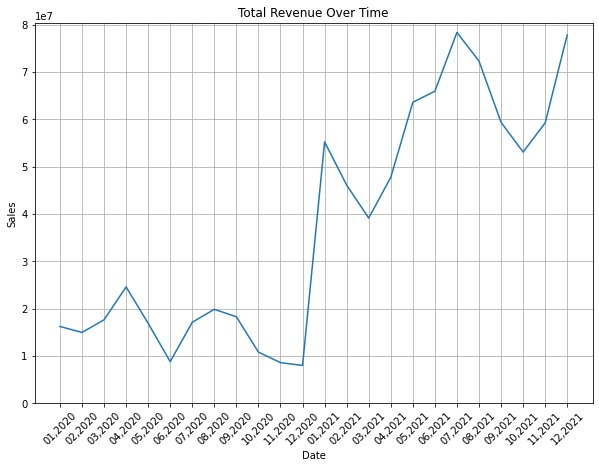

In [208]:
# Creating a Line Plot for revenue
a=pd.DataFrame(m_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

a.set_xlabel('Date')
a.set_ylabel('Sales')
a.set_title('Total Revenue Over Time')

a.set_ylim([0,max(m_revenue_df.values)+2000000])
plt.xticks(
    range(len(m_revenue_df.index)),
    [x.strftime('%m,%Y') for x in m_revenue_df.index],
    rotation=45
)
plt.show()

From the chart, we can observe a similar trend in sales revenue as there is in 'Units Sold'. The sales revenue takes a huge leap after December 2020 from $\$$8,026,527.0  to  $\$$55,225,396.0 in January 2021. 

Similar to 'Units Sold', this could be a result of increased purchasing after ease in Covid Lockdown restrictions, with increase in number of stores/retailers and increased footfall, the sales revenue has also increased.

In [209]:
# Looking at monthly profit data by using sum as an aggregate function
m_profit_df = df.set_index('Invoice Date')['Operating Profit'].resample('M').sum()

In [210]:
m_profit_df

Invoice Date
2020-01-31     5830005.41
2020-02-29     5207354.44
2020-03-31     5862006.26
2020-04-30     9301293.34
2020-05-31     5870841.95
2020-06-30     2292727.41
2020-07-31     4917665.11
2020-08-31     7338924.54
2020-09-30     7119702.44
2020-10-31     4139469.21
2020-11-30     2783476.24
2020-12-31     2712196.23
2021-01-31    19311929.10
2021-02-28    16185382.26
2021-03-31    14577781.74
2021-04-30    18257943.97
2021-05-31    24075413.38
2021-06-30    24421988.51
2021-07-31    29137233.48
2021-08-31    27112515.76
2021-09-30    23889884.29
2021-10-31    20938975.39
2021-11-30    21972045.19
2021-12-31    28878005.80
Freq: M, Name: Operating Profit, dtype: float64

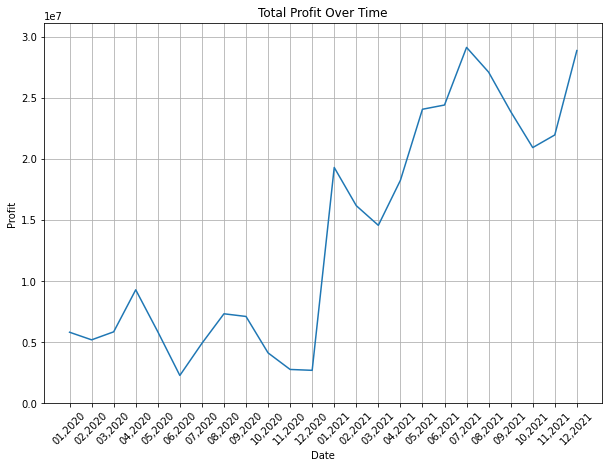

In [211]:
# Creating a Line Plot for profit
a=pd.DataFrame(m_profit_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

a.set_xlabel('Date')
a.set_ylabel('Profit')
a.set_title('Total Profit Over Time')

a.set_ylim([0,max(m_profit_df.values)+2000000])
plt.xticks(
    range(len(m_profit_df.index)),
    [x.strftime('%m,%Y') for x in m_profit_df.index],
    rotation=45
)
plt.show()

The chart for 'Profit' is identical to 'Revenue' chart, implying that the profit also increased along with sales without much compromise in profit margins by retailers.

## Trending Products Over Time 

###  By Units Sold

In [212]:
# Grouping the datafarme by month with Product

m_item_df = pd.DataFrame(df.set_index('Invoice Date').groupby([
        pd.Grouper(freq='M'), 'Product'
    ])['Units Sold'].sum())

In [213]:
m_item_df

Units Sold
Invoice Date Product                              
2020-01-31   Men's Apparel                    5902
             Men's Athletic Footwear          7791
             Men's Street Footwear           11919
             Women's Apparel                  8489
             Women's Athletic Footwear        6261
...                                            ...
2021-12-31   Men's Athletic Footwear         30849
             Men's Street Footwear           41059
             Women's Apparel                 28830
             Women's Athletic Footwear       22957
             Women's Street Footwear         25524

[144 rows x 1 columns]

In [214]:
# Finding out which products were sold the most by quantity on December 31, 2021
# Ranking products by the last month sales by sorting by quantity

last_m_sorted_df = m_item_df.loc['2021-12-31'].sort_values(
    by='Units Sold', ascending=False
).reset_index()

In [215]:
last_m_sorted_df

,Invoice Date,Product,Units Sold
0,2021-12-31,Men's Street Footwear,41059
1,2021-12-31,Men's Athletic Footwear,30849
2,2021-12-31,Women's Apparel,28830
3,2021-12-31,Women's Street Footwear,25524
4,2021-12-31,Women's Athletic Footwear,22957
5,2021-12-31,Men's Apparel,22027


From the list above, it is clear that "Men's Street Footwear" had the most units sold at 41,059. While "Men's Apparel" having least units sold i.e. 22,027, comes last in the list.

### By Sales

In [228]:
m_rev_df = pd.DataFrame(df.set_index('Invoice Date').groupby([
    pd.Grouper(freq='M'),'Product'
])['Total Sales'].sum())

In [219]:
m_rev_df

Total Sales
Invoice Date Product                               
2020-01-31   Men's Apparel                2288362.0
             Men's Athletic Footwear      2639958.0
             Men's Street Footwear        3859495.0
             Women's Apparel              3066713.0
             Women's Athletic Footwear    1990181.0
...                                             ...
2021-12-31   Men's Athletic Footwear     13195038.0
             Men's Street Footwear       18953848.0
             Women's Apparel             14910708.0
             Women's Athletic Footwear    9549962.0
             Women's Street Footwear     10547148.0

[144 rows x 1 columns]

In [220]:
# Finding out what items were sold the most by sales on December 31, 2021
# Rank items by the last month sales by sorting by sales

last_m_rev_sorted_df = m_rev_df.loc['2021-12-31'].sort_values(
    by='Total Sales', ascending=False
).reset_index()

In [221]:
last_m_rev_sorted_df

,Invoice Date,Product,Total Sales
0,2021-12-31,Men's Street Footwear,18953848.0
1,2021-12-31,Women's Apparel,14910708.0
2,2021-12-31,Men's Athletic Footwear,13195038.0
3,2021-12-31,Men's Apparel,10658726.0
4,2021-12-31,Women's Street Footwear,10547148.0
5,2021-12-31,Women's Athletic Footwear,9549962.0


From above list, it is clear that "Men's Street Footwear" had the most sale at $\$$18,953,848.0. While "Women's Athletic Footwear" having lowest sale sold i.e. $\$$9,549,962.0, comes last in the list.

#### Comparing Top products based on last month sales and number of units sold 

In [230]:
# Print both the dataframes
print(last_m_sorted_df.head())
print(last_m_rev_sorted_df.head())

  Invoice Date                    Product  Units Sold
0   2021-12-31      Men's Street Footwear       41059
1   2021-12-31    Men's Athletic Footwear       30849
2   2021-12-31            Women's Apparel       28830
3   2021-12-31    Women's Street Footwear       25524
4   2021-12-31  Women's Athletic Footwear       22957
  Invoice Date                  Product  Total Sales
0   2021-12-31    Men's Street Footwear   18953848.0
1   2021-12-31          Women's Apparel   14910708.0
2   2021-12-31  Men's Athletic Footwear   13195038.0
3   2021-12-31            Men's Apparel   10658726.0
4   2021-12-31  Women's Street Footwear   10547148.0


## Analysing Monthly Sales of Products

### According to Units Sold

In [231]:
# Using the top 5 items by units sold and finding the monthly sales for those items 

m_item_df = pd.DataFrame(
    df.loc[
        df['Product'].isin(["Men's Street Footwear", "Women's Apparel", "Men's Athletic Footwear", "Women's Athletic Footwear", "Women's Street Footwear"])
    ].set_index('Invoice Date').groupby([
        pd.Grouper(freq='M'), 'Product'
    ])['Units Sold'].sum()
)
m_item_df

Units Sold
Invoice Date Product                              
2020-01-31   Men's Athletic Footwear          7791
             Men's Street Footwear           11919
             Women's Apparel                  8489
             Women's Athletic Footwear        6261
             Women's Street Footwear          7971
...                                            ...
2021-12-31   Men's Athletic Footwear         30849
             Men's Street Footwear           41059
             Women's Apparel                 28830
             Women's Athletic Footwear       22957
             Women's Street Footwear         25524

[120 rows x 1 columns]

In [232]:
# transforming this data into a tabular format where columns are the individual 
# products and the rows are the invoice dates

items_df = m_item_df.reset_index().pivot('Invoice Date','Product').fillna(0)
items_df = items_df.reset_index()
items_df = items_df.set_index('Invoice Date')
items_df.columns = items_df.columns.droplevel(0)

In [233]:
items_df

Product,Men's Athletic Footwear,Men's Street Footwear,Women's Apparel,Women's Athletic Footwear,Women's Street Footwear
Invoice Date,,,,,
2020-01-31,7791,11919,8489,6261,7971
2020-02-29,7694,7205,4641,6071,6835
2020-03-31,8652,10022,8348,6955,7675
2020-04-30,9410,11960,9995,7125,7961
2020-05-31,6372,6949,6057,4844,5419
2020-06-30,2880,3800,2948,2202,2940
2020-07-31,6881,9368,6849,5017,5495
2020-08-31,12685,11492,10955,8670,10395
2020-09-30,7004,8163,8603,6975,8492


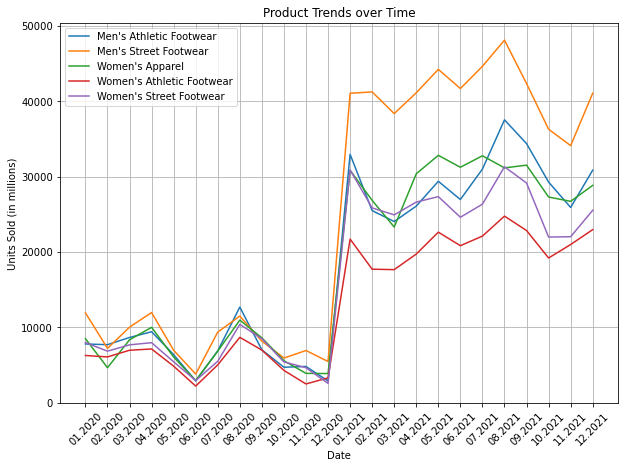

In [234]:
# Time series plot for the top 5 items

plot1 = pd.DataFrame(items_df.values).plot(
    figsize=(10,7),
    grid=True,
)

plot1.set_ylabel('Units Sold (in millions)')
plot1.set_xlabel('Date')
plot1.set_title('Product Trends over Time')

plot1.legend(items_df.columns, loc='upper left')

plt.xticks(
    range(len(items_df.index)), 
    [x.strftime('%m.%Y') for x in items_df.index], 
    rotation=45
)

plt.show()

In the above graph, the general trend follows the overall trend as seen in previous sales data i.e. sales drastically increasing after December 2020.

In year 2020, units sold for each product follows similar ups and downs with no clear overall top product. But throuout the year 2021, "Men's Street Footwear" has maintained a steady lead over any other product in terms of units sold even during the dip around the months of Sep-Oct-Nov, where evry product saw a decline in number of units sold.

### According to Total Sales

In [235]:
# Use the top 5 items by sales and find the monthly sales for those items 

m_sale_df = pd.DataFrame(
    df.loc[
        df['Product'].isin(["Men's Street Footwear", "Women's Apparel", "Men's Athletic Footwear", "Men's Apparel", "Women's Street Footwear"])
    ].set_index('Invoice Date').groupby([
        pd.Grouper(freq='M'), 'Product'
    ])['Total Sales'].sum()
)
m_sale_df

Total Sales
Invoice Date Product                             
2020-01-31   Men's Apparel              2288362.0
             Men's Athletic Footwear    2639958.0
             Men's Street Footwear      3859495.0
             Women's Apparel            3066713.0
             Women's Street Footwear    2409037.0
...                                           ...
2021-12-31   Men's Apparel             10658726.0
             Men's Athletic Footwear   13195038.0
             Men's Street Footwear     18953848.0
             Women's Apparel           14910708.0
             Women's Street Footwear   10547148.0

[120 rows x 1 columns]

In [236]:
# transforming this data into a tabular format where columns are the individual 
# products and the rows are the invoice dates
sales_df = m_sale_df.reset_index().pivot('Invoice Date','Product').fillna(0)
sales_df = sales_df.reset_index()
sales_df = sales_df.set_index('Invoice Date')
sales_df.columns = sales_df.columns.droplevel(0)

In [237]:
sales_df

Product,Men's Apparel,Men's Athletic Footwear,Men's Street Footwear,Women's Apparel,Women's Street Footwear
Invoice Date,,,,,
2020-01-31,2288362.0,2639958.0,3859495.0,3066713.0,2409037.0
2020-02-29,2284641.0,3055928.0,2882776.0,2113861.0,2478844.0
2020-03-31,2224467.0,3176299.0,3683790.0,3570368.0,2626326.0
2020-04-30,3789599.0,4197444.0,5403244.0,4931081.0,3353969.0
2020-05-31,2992951.0,2913820.0,3209137.0,3322570.0,2319492.0
2020-06-30,846588.0,1541967.0,1831450.0,1857493.0,1601820.0
2020-07-31,2355696.0,3093292.0,3840096.0,3291716.0,2378688.0
2020-08-31,3069057.0,4201586.0,3244959.0,3748758.0,2926020.0
2020-09-30,2759599.0,2741893.0,3504026.0,3835693.0,3015912.0


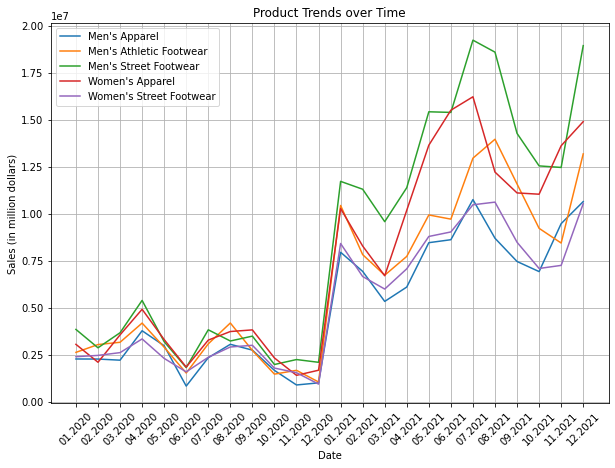

In [238]:
# Time series plot for the top 5 items

plot1 = pd.DataFrame(sales_df.values).plot(
    figsize=(10,7),
    grid=True,
)

plot1.set_ylabel('Sales (in million dollars)')
plot1.set_xlabel('Date')
plot1.set_title('Product Trends over Time')

plot1.legend(sales_df.columns, loc='upper left')

plt.xticks(
    range(len(sales_df.index)), 
    [x.strftime('%m.%Y') for x in sales_df.index], 
    rotation=45
)

plt.show()

From the above chart, we can see that "Men's Street Footwear" has been the most sold out product throughout the 2020-2021. Though, during the year 2020, their isn't much difference in the sales amongst products with "Men's Atheletic Footwear" and "Women's Apparel" coming on top during some months.

In the year 2021, "Men's Street Footwear" has maintained clear lead in sales except for the month of November where "Women's Apparel" has more sales.

